In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np

In [5]:
import sys
sys.path.append('../../src')
from DataHandler import DataHandler

In [6]:
dataHandler = DataHandler("../config.yaml")
df_content = dataHandler.load_data("data_files.raw_data.df_opalcontent")

📂 Lade: OPAL_content.p
   ✅ Geladen: 8,108 Zeilen × 7 Spalten


In [7]:
print("Number of unique content hashes: ", df_content["pipe:content_hash"].unique().shape[0], " out of ", df_content.shape[0])
print(df_content.shape[0] - df_content["pipe:content_hash"].unique().shape[0] )

Number of unique content hashes:  6084  out of  8108
2024


In [8]:
# eliminate duplicates
df_content.drop_duplicates(subset=["pipe:content_hash"], inplace=True)
df_content.shape[0]

6084

In [9]:
max_words = 100000
min_words = 90

Text(0, 0.5, 'Kumulative Verteilung')

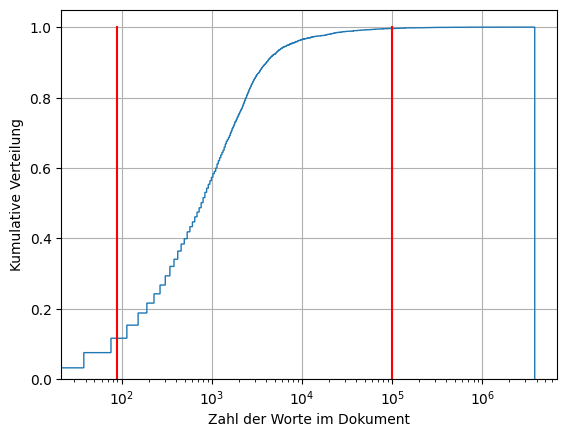

In [10]:
# generiere ein cummulatives HIstotrgramm für die Anzahl der Wörter in den Dokumenten
fig, ax = plt.subplots()
df_content["pipe:content_words"].hist(bins=100000, cumulative=True, density=True, histtype="step", ax=ax)
ax.set_xscale('log')
ax.plot([min_words, min_words], [0, 1], color="red")
ax.plot([max_words, max_words], [0, 1], color="red")
ax.set_xlabel("Zahl der Worte im Dokument")
ax.set_ylabel("Kumulative Verteilung")

In [11]:
df_content = df_content[(df_content["pipe:content_words"]>min_words) & (df_content["pipe:content_words"]<max_words)]
df_content.shape[0]

5505

In [12]:
df_content["pipe:most_prob_language"].value_counts()

pipe:most_prob_language
de    4655
en     794
ca      21
nl       4
et       3
pl       3
sv       3
fr       3
es       2
bg       2
lt       2
so       2
cy       2
uk       1
hr       1
da       1
vi       1
af       1
tl       1
fi       1
ro       1
Name: count, dtype: int64

<Axes: xlabel='pipe:content_words', ylabel='pipe:language_probability'>

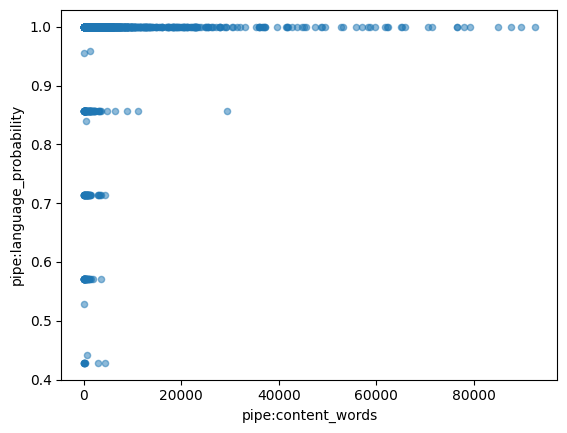

In [13]:
df_content.plot.scatter(x="pipe:content_words", y="pipe:language_probability",  alpha=0.5)

In [14]:
df_content = df_content[(df_content["pipe:language_probability"] > 0.9) & (df_content["pipe:most_prob_language"] == "de")]
df_content.shape[0]

4560